In [154]:
import sys

sys.path.append("../../src")

In [155]:
import numpy as np
import gaussian_overlap
import importlib
import h5py

from scipy.optimize import minimize

importlib.reload(gaussian_overlap)
from gaussian_overlap import *

In [156]:
with h5py.File("../make_base/sto_ng.h5", "r") as f:
    alphas = f["1s/sto-3g/alpha"][:]
    cs = f["1s/sto-3g/c"][:]
alphas = np.array(alphas)
cs = np.array(cs)

# cs = cs * (2 * alphas / np.pi) ** (3 / 4)

In [157]:
def energy(r):
    zetaH = 1.24
    param1 = {
        "center": np.array([0, 0, 0]),
        "lmn": (0, 0, 0),
        "exps": np.array(alphas) * zetaH**2,
        "coefs": np.array(cs),
    }
    param2 = {
        "center": np.array([r, 0, 0]),
        "lmn": (0, 0, 0),
        "exps": np.array(alphas) * zetaH**2,
        "coefs": np.array(cs),
    }
    a = BasisFunction(**param1)
    b = BasisFunction(**param2)
    eaa1 = T(a, a) - V(a, a, np.array([0, 0, 0])) - V(a, a, np.array([r, 0, 0]))
    eab1 = T(a, b) - V(a, b, np.array([0, 0, 0])) - V(a, b, np.array([r, 0, 0]))
    ebb1 = T(b, b) - V(b, b, np.array([0, 0, 0])) - V(b, b, np.array([r, 0, 0]))
    eaa2 = ERI(a, a, a, a) + 2 * ERI(a, a, a, b) + ERI(a, a, b, b)
    eab2 = ERI(a, b, a, a) + 2 * ERI(a, b, a, b) + ERI(a, b, b, b)
    ebb2 = ERI(b, b, a, a) + 2 * ERI(b, b, a, b) + ERI(b, b, b, b)
    norm = S(a, a) + 2 * S(a, b) + S(b, b)
    return (
        2 * (eaa1 + 2 * eab1 + ebb1) / norm + (eaa2 + 2 * eab2 + ebb2) / norm**2 + 1 / r
    )

Text(0, 0.5, 'E(H2) - 2E(H) (a. u.)')

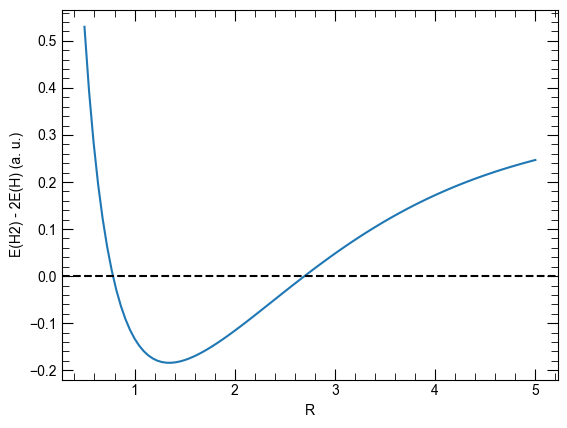

In [158]:
r = np.linspace(0.5, 5, 100)
e = np.array([energy(i) for i in r])
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(r, e + 2 * 0.4666)
ax.axhline(0, color="black", linestyle="--")
ax.set_xlabel("R")
ax.set_ylabel("E(H2) - 2E(H) (a. u.)")